# Load relevant packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import sys

sys.path.append("neuro-example-aux")
from utilities import *
from random_walk import *



sys.path.append("../../")
from DREiMac.dreimac.toroidalcoords import *


# Load specific example

In [2]:
with open('neuro-example-aux/path_1.pickle', 'rb') as handle:
    path_on_circle_1 = pickle.load(handle)
    
with open('neuro-example-aux/path_2.pickle', 'rb') as handle:
    path_on_circle_2 = pickle.load(handle)
    
with open('neuro-example-aux/path_3.pickle', 'rb') as handle:
    path_on_circle_3 = pickle.load(handle)
    
with open('neuro-example-aux/response_matrix.pickle', 'rb') as handle:
    full_response_matrix = pickle.load(handle)
    
with open('neuro-example-aux/cc.pickle', 'rb') as handle:
    cc = pickle.load(handle)

In [3]:
# Get circular coordinates info

order_by_prominence = prominence_diagram(cc.dgms_[1])

alpha = 0.4
how_many_coords = 3
cocycles_idxs = list(map(lambda x: [x], order_by_prominence[:how_many_coords] ))


circ_coords_consistent_old, gram_matrix = cc.get_coordinates(perc = alpha, cocycle_idxs= cocycles_idxs, inner_product = "uniform" , return_gram_matrix=True)
circ_coords_consistent, ngm_consistent, cb = reduce_circular_coordinates(circ_coords_consistent_old, gram_matrix)

#circ_coords_uniform_old, gram_matrix = cc.get_coordinates(perc = alpha, cocycle_idxs= cocycles_idxs, inner_product = "uniform" , return_gram_matrix=True)
#circ_coords_uniform, ngm_uniform, cb = reduce_circular_coordinates(circ_coords_uniform_old, gram_matrix)
#
#circ_coords_exponential_old, gram_matrix = cc.get_coordinates(perc = alpha, cocycle_idxs= cocycles_idxs, inner_product = "exponential" , return_gram_matrix=True)
#circ_coords_exponential, ngm_exponential, cb = reduce_circular_coordinates(circ_coords_exponential_old, gram_matrix)

(0.0, 1.0772941529750824)

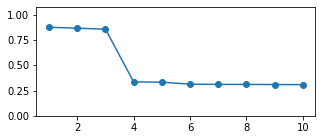

In [4]:
# Displays prominence diagram of circular coordinates

max_proms = 10
prominences = cc.dgms_[1][:,1] - cc.dgms_[1][:,0]
how_many = min(max_proms, len(prominences))
order_by_prominence = np.argsort(-prominences)
prominences = prominences[order_by_prominence]
prom_fig = plt.figure(figsize=(5,2))
plt.plot(list(range(1,how_many+1)), prominences[:how_many], '-o')
plt.ylim([0,prominences[0]+.2])

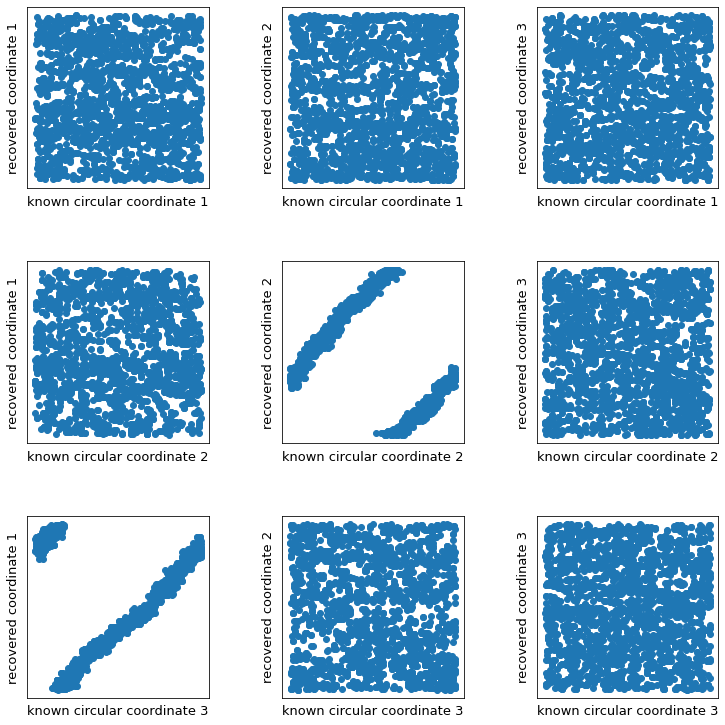

In [5]:
# Plots recovered coordinates with Circular Coordinates Algorithm vs. known circular coordinates

fig_old, axs_old = plt.subplots(nrows=3, ncols=3, figsize = (12, 12))
fig_old.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)




axs_old[0,0].scatter(path_on_circle_1, circ_coords_consistent_old[0])
axs_old[0,1].scatter(path_on_circle_1, circ_coords_consistent_old[1])
axs_old[0,2].scatter(path_on_circle_1, circ_coords_consistent_old[2])
axs_old[1,0].scatter(path_on_circle_2, circ_coords_consistent_old[0])
axs_old[1,1].scatter(path_on_circle_2, circ_coords_consistent_old[1])
axs_old[1,2].scatter(path_on_circle_2, circ_coords_consistent_old[2])
axs_old[2,0].scatter(path_on_circle_3, circ_coords_consistent_old[0])
axs_old[2,1].scatter(path_on_circle_3, circ_coords_consistent_old[1])
axs_old[2,2].scatter(path_on_circle_3, circ_coords_consistent_old[2])

for i in range(3):
    for j in range(3):
        axs_old[i,j].tick_params(bottom = False, left = False, labelleft = False, labelbottom = False)
        axs_old[i,j].set_xlabel('known circular coordinate ' + str(i+1), fontsize = 13, labelpad=7)
        axs_old[i,j].set_ylabel('recovered coordinate ' + str(j+1), fontsize = 13, labelpad=7)

In [6]:
gram_matrix

array([[  72.726793  ,   -0.76850629,    3.25575267],
       [  -0.76850629,   72.96215935, -146.31958277],
       [   3.25575267, -146.31958277,  365.6202985 ]])

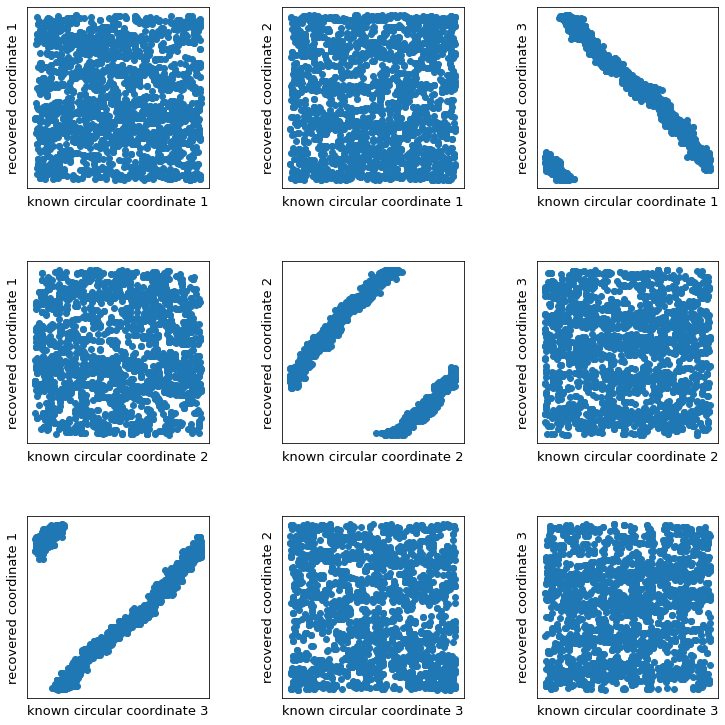

In [7]:
# Plots recovered coordinates with Toroidal Coordinates Algorithm vs. known circular coordinates

fig, axs = plt.subplots(nrows=3, ncols=3, figsize = (12, 12))
fig.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)


axs[0,0].scatter(path_on_circle_1, circ_coords_consistent[0])
axs[0,1].scatter(path_on_circle_1, circ_coords_consistent[1])
axs[0,2].scatter(path_on_circle_1, circ_coords_consistent[2])
axs[1,0].scatter(path_on_circle_2, circ_coords_consistent[0])
axs[1,1].scatter(path_on_circle_2, circ_coords_consistent[1])
axs[1,2].scatter(path_on_circle_2, circ_coords_consistent[2])
axs[2,0].scatter(path_on_circle_3, circ_coords_consistent[0])
axs[2,1].scatter(path_on_circle_3, circ_coords_consistent[1])
axs[2,2].scatter(path_on_circle_3, circ_coords_consistent[2])

for i in range(3):
    for j in range(3):
        axs[i,j].tick_params(bottom = False, left = False, labelleft = False, labelbottom = False)
        axs[i,j].set_xlabel('known circular coordinate ' + str(i+1), fontsize = 13, labelpad=7)
        axs[i,j].set_ylabel('recovered coordinate ' + str(j+1), fontsize = 13, labelpad=7)

In [8]:
ngm_consistent

array([[72.726793  , -0.76850629,  1.71874009],
       [-0.76850629, 72.96215935, -0.39526408],
       [ 1.71874009, -0.39526408, 72.19060479]])

# Or explore your own example

In [2]:
# Choose a neural response function. Default is linear relu, with the following arguments
# linear_relu_response(max firing rate, slope)

response_function = linear_relu_response_function(1, -3)

In [11]:
# Generate walks on circles and calculate neural reponses with
# skipping_circle_walk(num_walks, walk_length)

path_on_circle_1 = skipping_circle_walk(50,50)
neurons_on_circle_1 = generate_uniform_neurons_on_circle(6)
response_matrix_1 = calculate_neural_response_matrix(neurons_on_circle_1, path_on_circle_1, response_function)


path_on_circle_2 = skipping_circle_walk(50, 50)
neurons_on_circle_2 = generate_uniform_neurons_on_circle(6)
response_matrix_2 = calculate_neural_response_matrix(neurons_on_circle_2, path_on_circle_2, response_function)


path_on_circle_3 = skipping_circle_walk(50, 50)
neurons_on_circle_3 = generate_uniform_neurons_on_circle(6)
response_matrix_3 = calculate_neural_response_matrix(neurons_on_circle_3, path_on_circle_3, response_function)

# Create response matrix
full_response_matrix = np.concatenate((np.concatenate((response_matrix_1, response_matrix_2), axis = 0), response_matrix_3), axis = 0)


In [12]:
# Calculate circular coordinates

cc = CircularCoords(full_response_matrix.T, distance_matrix = False, n_landmarks= 1000, prime = 41)

In [13]:
# Get circular coordinates info

order_by_prominence = prominence_diagram(cc.dgms_[1])

alpha = 0.4
how_many_coords = 3
cocycles_idxs = list(map(lambda x: [x], order_by_prominence[:how_many_coords] ))


circ_coords_consistent_old, gram_matrix = cc.get_coordinates(perc = alpha, cocycle_idxs= cocycles_idxs, inner_product = "uniform" , return_gram_matrix=True)
circ_coords_consistent, ngm_consistent, cb = reduce_circular_coordinates(circ_coords_consistent_old, gram_matrix)

#circ_coords_uniform_old, gram_matrix = cc.get_coordinates(perc = alpha, cocycle_idxs= cocycles_idxs, inner_product = "uniform" , return_gram_matrix=True)
#circ_coords_uniform, ngm_uniform, cb = reduce_circular_coordinates(circ_coords_uniform_old, gram_matrix)
#
#circ_coords_exponential_old, gram_matrix = cc.get_coordinates(perc = alpha, cocycle_idxs= cocycles_idxs, inner_product = "exponential" , return_gram_matrix=True)
#circ_coords_exponential, ngm_exponential, cb = reduce_circular_coordinates(circ_coords_exponential_old, gram_matrix)

(0.0, 1.0916656076908111)

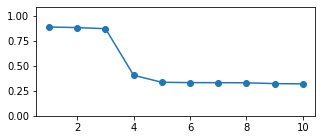

In [14]:
# Displays prominence diagram of circular coordinates

max_proms = 10
prominences = cc.dgms_[1][:,1] - cc.dgms_[1][:,0]
how_many = min(max_proms, len(prominences))
order_by_prominence = np.argsort(-prominences)
prominences = prominences[order_by_prominence]
prom_fig = plt.figure(figsize=(5,2))
plt.plot(list(range(1,how_many+1)), prominences[:how_many], '-o')
plt.ylim([0,prominences[0]+.2])

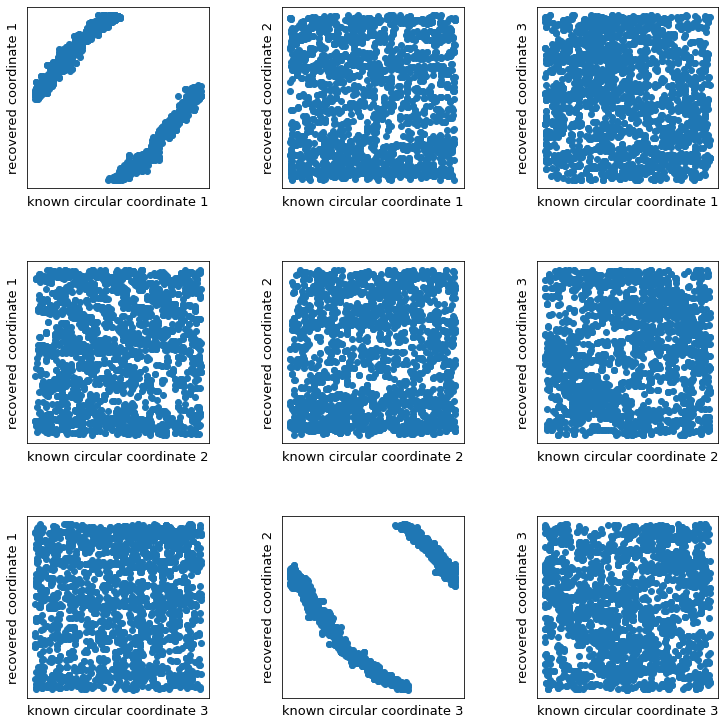

In [15]:
# Plots recovered coordinates with Circular Coordinates Algorithm vs. known circular coordinates

fig_old, axs_old = plt.subplots(nrows=3, ncols=3, figsize = (12, 12))
fig_old.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)




axs_old[0,0].scatter(path_on_circle_1, circ_coords_consistent_old[0])
axs_old[0,1].scatter(path_on_circle_1, circ_coords_consistent_old[1])
axs_old[0,2].scatter(path_on_circle_1, circ_coords_consistent_old[2])
axs_old[1,0].scatter(path_on_circle_2, circ_coords_consistent_old[0])
axs_old[1,1].scatter(path_on_circle_2, circ_coords_consistent_old[1])
axs_old[1,2].scatter(path_on_circle_2, circ_coords_consistent_old[2])
axs_old[2,0].scatter(path_on_circle_3, circ_coords_consistent_old[0])
axs_old[2,1].scatter(path_on_circle_3, circ_coords_consistent_old[1])
axs_old[2,2].scatter(path_on_circle_3, circ_coords_consistent_old[2])

for i in range(3):
    for j in range(3):
        axs_old[i,j].tick_params(bottom = False, left = False, labelleft = False, labelbottom = False)
        axs_old[i,j].set_xlabel('known circular coordinate ' + str(i+1), fontsize = 13, labelpad=7)
        axs_old[i,j].set_ylabel('recovered coordinate ' + str(j+1), fontsize = 13, labelpad=7)

In [16]:
gram_matrix

array([[ 67.20016534,   1.28481253,   1.99880982],
       [  1.28481253,  65.63697236,  64.45333881],
       [  1.99880982,  64.45333881, 128.5445401 ]])

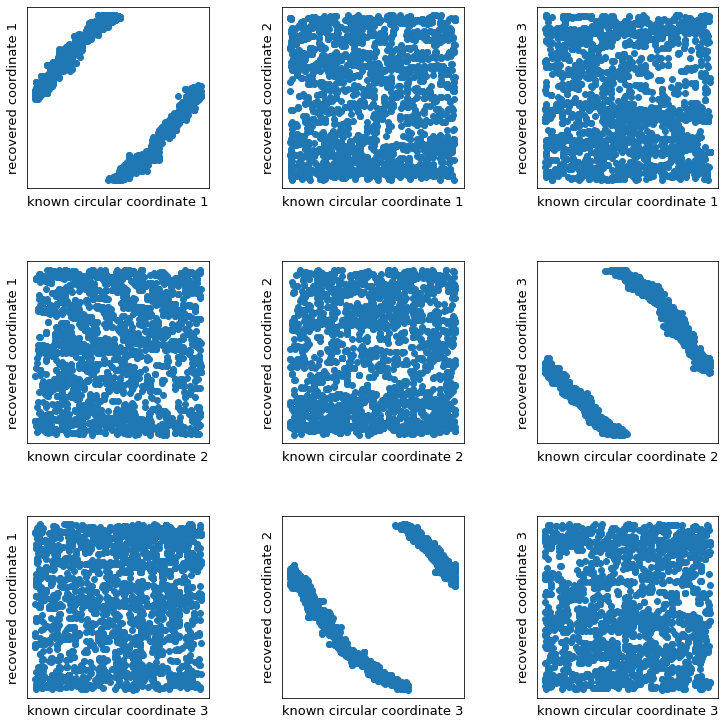

In [17]:
# Plots recovered coordinates with Toroidal Coordinates Algorithm vs. known circular coordinates

fig, axs = plt.subplots(nrows=3, ncols=3, figsize = (12, 12))
fig.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)


axs[0,0].scatter(path_on_circle_1, circ_coords_consistent[0])
# axs[0,0].set(xlabel = 'known circular coordinate 1', ylabel = 'recovered circular coordinate 1')
axs[0,1].scatter(path_on_circle_1, circ_coords_consistent[1])
# axs[0,1].set(xlabel = 'known circular coordinate 1', ylabel = 'recovered circular coordinate 2')
axs[0,2].scatter(path_on_circle_1, circ_coords_consistent[2])
# axs[0,2].set(xlabel = 'known circular coordinate 1', ylabel = 'recovered circular coordinate 3')
axs[1,0].scatter(path_on_circle_2, circ_coords_consistent[0])
# axs[1,0].set(xlabel = 'known circular coordinate 2', ylabel = 'recovered circular coordinate 1')
axs[1,1].scatter(path_on_circle_2, circ_coords_consistent[1])
# axs[1,1].set(xlabel = 'known circular coordinate 2', ylabel = 'recovered circular coordinate 2')
axs[1,2].scatter(path_on_circle_2, circ_coords_consistent[2])
# axs[1,2].set(xlabel = 'known circular coordinate 2', ylabel = 'recovered circular coordinate 3')
axs[2,0].scatter(path_on_circle_3, circ_coords_consistent[0])
# axs[2,0].set(xlabel = 'known circular coordinate 3', ylabel = 'recovered circular coordinate 1')
axs[2,1].scatter(path_on_circle_3, circ_coords_consistent[1])
# axs[2,1].set(xlabel = 'known circular coordinate 3', ylabel = 'recovered circular coordinate 2')
axs[2,2].scatter(path_on_circle_3, circ_coords_consistent[2])
# axs[2,2].set(xlabel = 'known circular coordinate 3', ylabel = 'recovered circular coordinate 3')

for i in range(3):
    for j in range(3):
        axs[i,j].tick_params(bottom = False, left = False, labelleft = False, labelbottom = False)
        axs[i,j].set_xlabel('known circular coordinate ' + str(i+1), fontsize = 13, labelpad=7)
        axs[i,j].set_ylabel('recovered coordinate ' + str(j+1), fontsize = 13, labelpad=7)

In [18]:
# New Gram matrix

ngm_consistent

array([[67.20016534,  1.28481253,  0.71399729],
       [ 1.28481253, 65.63697236, -1.18363355],
       [ 0.71399729, -1.18363355, 65.27483484]])